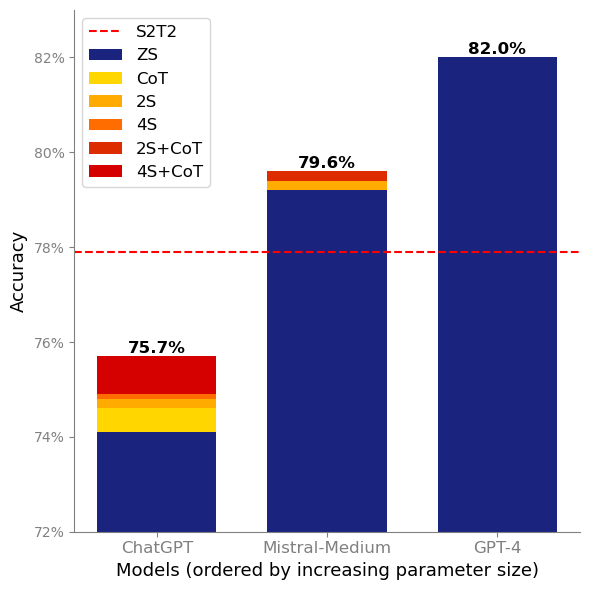

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

models = ['ChatGPT', 'Mistral-Medium', 'GPT-4']
base_accuracy = [0.741, 0.792, 0.820] 

improvements = {
    'CoT': [0.746 - 0.741, 0.792 - 0.792, 0.820 - 0.820],
    '2S': [0.748 - 0.746, 0.796 - 0.794, 0.815 - 0.820],
    '4S': [0.749 - 0.748, 0.714 - 0.792, 0.812 - 0.820],
    '2S+CoT': [0.740 - 0.741, 0.794 - 0.792, 0.819 - 0.820],
    '4S+CoT': [0.757 - 0.749, 0.707 - 0.792, 0.804 - 0.820]
}
index = np.arange(len(models))

# Filter out negative improvements and directly use positive ones
filtered_improvements = {key: np.maximum(0, value) for key, value in improvements.items()}

fig, ax = plt.subplots(figsize=(6, 6))
improved_colors = ['#FFD600', '#FFAB00', '#FF6D00', '#DD2C00', '#D50000']

bar_width = 0.7
base_bars = ax.bar(index, base_accuracy, bar_width, label='ZS', color='#1A237E')

baseline_model = 'S2T2'
baseline_accuracy = 0.779
ax.axhline(y=baseline_accuracy, color='r', linestyle='--', label=f'{baseline_model}')

# Convert y-axis to display percentages
def to_percentage(y, position):
    return f"{100 * y:.0f}%"
ax.yaxis.set_major_formatter(FuncFormatter(to_percentage))

current_top = np.array(base_accuracy)

for i, (key, value) in enumerate(filtered_improvements.items()):
    positive_values = np.maximum(0, value)
    bars = ax.bar(index, positive_values, bar_width, bottom=current_top, label=key, color=improved_colors[i])
    current_top += positive_values

stack_tops = [0.757, 0.796, 0.820]
for i, stack_top in enumerate(stack_tops):
    ax.text(index[i], stack_top, f'{stack_top:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=12)

ax.set_ylim(0.72, 0.83)
ax.set_ylabel('Accuracy', fontsize=13)
ax.set_xlabel('Models (ordered by increasing parameter size)', fontsize=13)
ax.set_xticks(index)
ax.set_xticklabels(models, fontsize=12, color='black')
ax.legend(loc='upper left', fontsize=12)

# Aesthetic Improvements
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.tick_params(colors='grey', which='both')
ax.yaxis.label.set_color('black')

plt.tight_layout()
plt.show()
fig.savefig('results_accuracy.png', dpi=600)


In [3]:
fig.savefig('results_accuracy.png', dpi=600)